In [1]:
# deleting a number of images due huge amount of  images found
# import os
# import glob
# import random


# for i in range (0, 74):
#     images = glob.glob('./cell_images/Test/Parasitized/*')
#     randomNum = random.randint(0,len(images))
#     os.remove(images[randomNum])


# Malaria Detection

- This Model is made with a Dataset containing images of blood samples.
- The user is required to upload an image of the blood sample.
- The result will be classified into either infected or non infected.

In [3]:
# Importing all the libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [5]:
# re-size all the images
IMAGE_SIZE = [224, 224]


In [6]:
# setting the train and test path files
train_path = 'cell_images/Train'
test_path = 'cell_images/Test'


In [7]:
# Add preprocessing layer to front
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# we are removing the last to layers so that we can add our layers to the end


In [8]:
# NOT training the existing the weights because the weights are already trained and this is the use of transfer learning
for layer in vgg.layers:
    layer.trainable = False
    

In [9]:
# Getting the number of classes from our dataset
folders = glob('cell_images/Train/*')
folders


['cell_images/Train\\Parasitized', 'cell_images/Train\\Uninfected']

In [10]:
# Flattening all the previous layers
x = Flatten()(vgg.output)


In [11]:
# Adding my 2 categories dense layers into the last layer of the vgg19 (The variable folders contain the location of my 2 categories)
prediction = Dense(len(folders), activation='softmax')(x) 

# softmax activation function is just like a sigmod activation function which will make your value fall between 0 to 1 

In [12]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)


In [13]:
# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [14]:
# telling the model what loss and optimization functions has to be used along with the type of metrics
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [16]:
# Use the Image Data Generator to imprt the images from the dataset'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )

# scaling down all my images by turning all the pixel values from 0 to 1
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('cell_images/Train/',
                                                target_size = (224, 224),
                                                batch_size=32,
                                                class_mode='categorical')
# class_mode is set to categorical because it has 2 classes 'Parasitized' and 'Uninfected'

test_set = test_datagen.flow_from_directory('cell_images/Test/',
                                                target_size = (224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 3050 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Fit the model
result = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps = len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
96/96 [==============================] - 1834s 19s/step - loss: 0.6356 - accuracy: 0.7295 - val_loss: 0.4687 - val_accuracy: 0.7540
Epoch 2/10
96/96 [==============================] - 1667s 17s/step - loss: 0.3556 - accuracy: 0.8505 - val_loss: 0.4030 - val_accuracy: 0.8340
Epoch 3/10
96/96 [==============================] - 1671s 17s/step - loss: 0.3059 - accuracy: 0.8711 - val_loss: 0.3184 - val_accuracy: 0.8690
Epoch 4/10
96/96 [==============================] - 1651s 17s/step - loss: 0.2361 - accuracy: 0.9075 - val_loss: 0.3096 - val_accuracy: 0.8690
Epoch 5/10
96/96 [==============================] - 1391s 14s/step - loss: 0.2049 - accuracy: 0.9256 - val_loss: 0.3565 - val_accuracy: 0.8550
Epoch 6/10
96/96 [==============================] - 1405s 15s/step - loss: 0.2473 - accuracy: 0.8948 - val_loss: 0.2715 - val_accuracy: 0.8880
Epoch 7/10
96/96 [==============================] - 1434s 15s/step

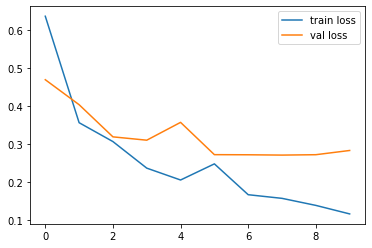

<Figure size 432x288 with 0 Axes>

In [21]:
# loss: 0.1156 - accuracy: 0.9659 - val_loss: 0.2825 - val_accuracy: 0.8870

# Plotting the loss values with the validation loss values
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

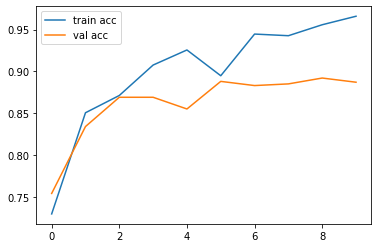

<Figure size 432x288 with 0 Axes>

In [22]:
# Plotting the accuracy values with the validation accuracy values
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [29]:
# USING XCEPTION TO CREATE THE MODEL
from keras.applications.xception import Xception

xcep = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

for layer in xcep.layers:
    layer.trainable = False

x2 = Flatten()(xcep.output)

prediction = Dense(len(folders), activation='softmax')(x2)

model2 = Model(inputs=xcep.input, outputs=prediction)

model2.summary()

model2.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

result2 = model2.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

# result for the 10 epoch
# loss: 0.5618 - accuracy: 0.9390 - val_loss: 0.7285 - val_accuracy: 0.9200

# result for the 20 epoch
# loss: 0.5789 - accuracy: 0.9420 - val_loss: 0.7598 - val_accuracy: 0.9300


Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

Epoch 1/20
96/96 [==============================] - 474s 5s/step - loss: 1.0904 - accuracy: 0.8646 - val_loss: 0.5316 - val_accuracy: 0.9140
Epoch 2/20
96/96 [==============================] - 508s 5s/step - loss: 0.8127 - accuracy: 0.8961 - val_loss: 0.5842 - val_accuracy: 0.9350
Epoch 3/20
96/96 [==============================] - 677s 7s/step - loss: 0.9008 - accuracy: 0.9069 - val_loss: 0.9548 - val_accuracy: 0.8950
Epoch 4/20
96/96 [==============================] - 522s 5s/step - loss: 0.6745 - accuracy: 0.9184 - val_loss: 0.9465 - val_accuracy: 0.9150
Epoch 5/20
96/96 [==============================] - 475s 5s/step - loss: 0.5959 - accuracy: 0.9262 - val_loss: 0.7824 - val_accuracy: 0.9170
Epoch 6/20
96/96 [==============================] - 531s 6s/step - loss: 0.5156 - accuracy: 0.9364 - val_loss: 1.0499 - val_accuracy: 0.8980
Epoch 7/20
96/96 [==============================] - 493s 5s/step - loss: 0.5836 - accuracy: 0.9338 - val_loss: 0.4982 - val_accuracy: 0.9380
Epoch 8/20
96

In [31]:
import tensorflow as tf
from keras.models import load_model

model.save('model_xcepModel.h5')

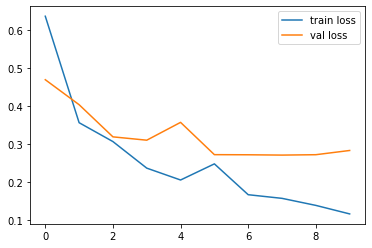

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [17]:
# USING ResNet50 CREATE THE MODEL
from keras.applications.resnet50 import ResNet50

resNet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

for layer in resNet.layers:
    layer.trainable = False

x3 = Flatten()(resNet.output)

prediction = Dense(len(folders), activation='softmax')(x3)

model3 = Model(inputs=resNet.input, outputs=prediction)

model3.summary()

model3.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

result3 = model3.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

# The result from this model
# loss: 0.6916 - accuracy: 0.6479 - val_loss: 1.5950 - val_accuracy: 0.5020


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

Epoch 1/10
96/96 [==============================] - 488s 5s/step - loss: 1.5844 - accuracy: 0.5430 - val_loss: 0.6414 - val_accuracy: 0.6460
Epoch 2/10
96/96 [==============================] - 473s 5s/step - loss: 0.7806 - accuracy: 0.5895 - val_loss: 0.6518 - val_accuracy: 0.6560
Epoch 3/10
96/96 [==============================] - 491s 5s/step - loss: 0.7444 - accuracy: 0.6056 - val_loss: 0.7112 - val_accuracy: 0.5930
Epoch 4/10
96/96 [==============================] - 466s 5s/step - loss: 0.7493 - accuracy: 0.6049 - val_loss: 0.8145 - val_accuracy: 0.5690
Epoch 5/10
96/96 [==============================] - 497s 5s/step - loss: 0.8869 - accuracy: 0.5836 - val_loss: 1.7082 - val_accuracy: 0.5010
Epoch 6/10
96/96 [==============================] - 530s 6s/step - loss: 0.6947 - accuracy: 0.6492 - val_loss: 0.6144 - val_accuracy: 0.6850
Epoch 7/10
96/96 [==============================] - 541s 6s/step - loss: 0.7634 - accuracy: 0.6141 - val_loss: 0.8170 - val_accuracy: 0.5870
Epoch 8/10
96

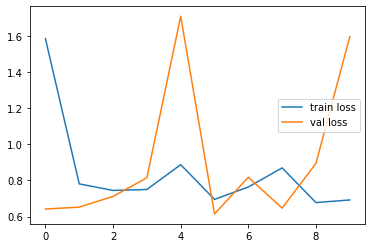

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(result3.history['loss'], label='train loss')
plt.plot(result3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

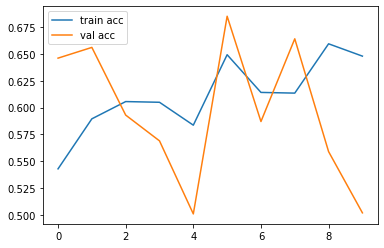

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(result3.history['accuracy'], label='train acc')
plt.plot(result3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
